## A Hands-on Workshop series in Machine Learning
### Session 6: Image classification using CIFAR-10 dataset
#### Instructor: Aashita Kesarwani


[CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10) is a popular dataset for image classification used in machine learning and computer vision. It consists of (32X32) color images (50,000 for training plus 10,000 for validation) in 10 classes labeled from 0 to 9: 
0. airplanes
1. cars 
2. birds
4. cats
5. deer
6. dogs
7. frogs 
8. horses
9. ships
10. trucks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')

Using TensorFlow backend.


50000 train samples
10000 validation samples


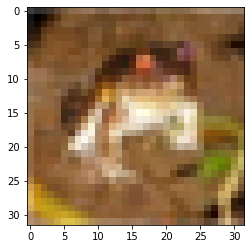

In [2]:
plt.imshow(X_train[0])
plt.show()

The labels are values between 0 and 9 corresponding to the class. This image is labelled 6 for frogs:

In [3]:
y_train[0]

array([6], dtype=uint8)

We will encode the labels as one-hot vectors so that they can be used more easily with our neural network later, since the network will output a vector of length 10 corresponding to how likely the image is a member of each class.

In [4]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)

Let us check the one-hot encoded vector for the first training example that is labeled as zero.

In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Let us define the network architecture for the CNN model. We will use [`Conv2D`](https://keras.io/layers/convolutional/) for the convolution layers, [`MaxPooling2D`](https://keras.io/layers/pooling/) for the pooling layers, [`Flatten`](https://keras.io/layers/core/#flatten) for flattening the feature maps, [`Dense`](https://keras.io/layers/core/#dense) for fully-connected layers and [`Dropout`](https://keras.io/layers/core/#dropout) for the dropout. 

For the [`Conv2D`](https://keras.io/layers/convolutional/), 
* the `filters` passes the number of filters
* the `kernel_size` passes the size of filters
* the `he_uniform` initializer is a way to initialize the weights that helps training
* the `'same'` padding means that the width and height of the output of the layer are the same as the input.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

input_shape = (32, 32, 3)

# Build and train the CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) # outputs a matrix with half width and height
model.add(Dropout(0.2)) # Dropout layers prevent overfitting, helping the model generalize

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

Now train the model:

In [9]:
batch_size = 64
num_classes = 10
epochs = 15

opt = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999) # Adam is one good optimizer function; lr is the learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 261s 5ms/step - loss: 2.2283 - acc: 0.1427 - val_loss: 1.9553 - val_acc: 0.2697
Epoch 2/15
50000/50000 [==============================] - 216s 4ms/step - loss: 1.7993 - acc: 0.3239 - val_loss: 1.6642 - val_acc: 0.3807
Epoch 3/15
50000/50000 [==============================] - 175s 4ms/step - loss: 1.6148 - acc: 0.4016 - val_loss: 1.5051 - val_acc: 0.4429
Epoch 4/15
50000/50000 [==============================] - 181s 4ms/step - loss: 1.4984 - acc: 0.4485 - val_loss: 1.4286 - val_acc: 0.4738
Epoch 5/15
50000/50000 [==============================] - 176s 4ms/step - loss: 1.4099 - acc: 0.4887 - val_loss: 1.3367 - val_acc: 0.5138
Epoch 6/15
50000/50000 [==============================] - 175s 4ms/step - loss: 1.3267 - acc: 0.5202 - val_loss: 1.2592 - val_acc: 0.5450
Epoch 7/15
50000/50000 [==============================] - 174s 3ms/step - loss: 1.2437 - acc: 0.5495 - val_loss: 1.1898 - 

This may take a while to run (as the network has 550,570 parameters training on the dataset of 50,000 images). Once it's done, it should have reached roughly 65-70% test accuracy if you didn't change anything about the model. Not terrible given that there are 10 categories! With more sophisticated network architectures we can get this number higher and higher. 

Exercise: To get a better test accuracy and speed up learning, try tuning various hyperparameters of the network such as
* the number of layers 
* the type of layers
* the number of nodes in the layers
* the learning rate or using different optimizers such as Adam, RMSprop, AdaGrad, etc., 
* the dropout probability
* the activation functions 
* the number of epochs
* the batch size